All of the code presented in this notoebook is derived from or based on the O'Reilly® book Introduction to Machine Learning with Python © 2017 by Andreas C. Muller and Sarah Guido. Please make sure you present the correct attestation to this book if you reference or utilize any of the information in this notebook. And please buy the book, it's excellent!

This notebook is an introductory notebook created to explore O'Reilly Introduction to ML w/Python in the area of principal component analysis and dimensionality reduction.

In [33]:
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
malignant = cancer.data[cancer.target == 1]
benign = cancer.data[cancer.target == 0]

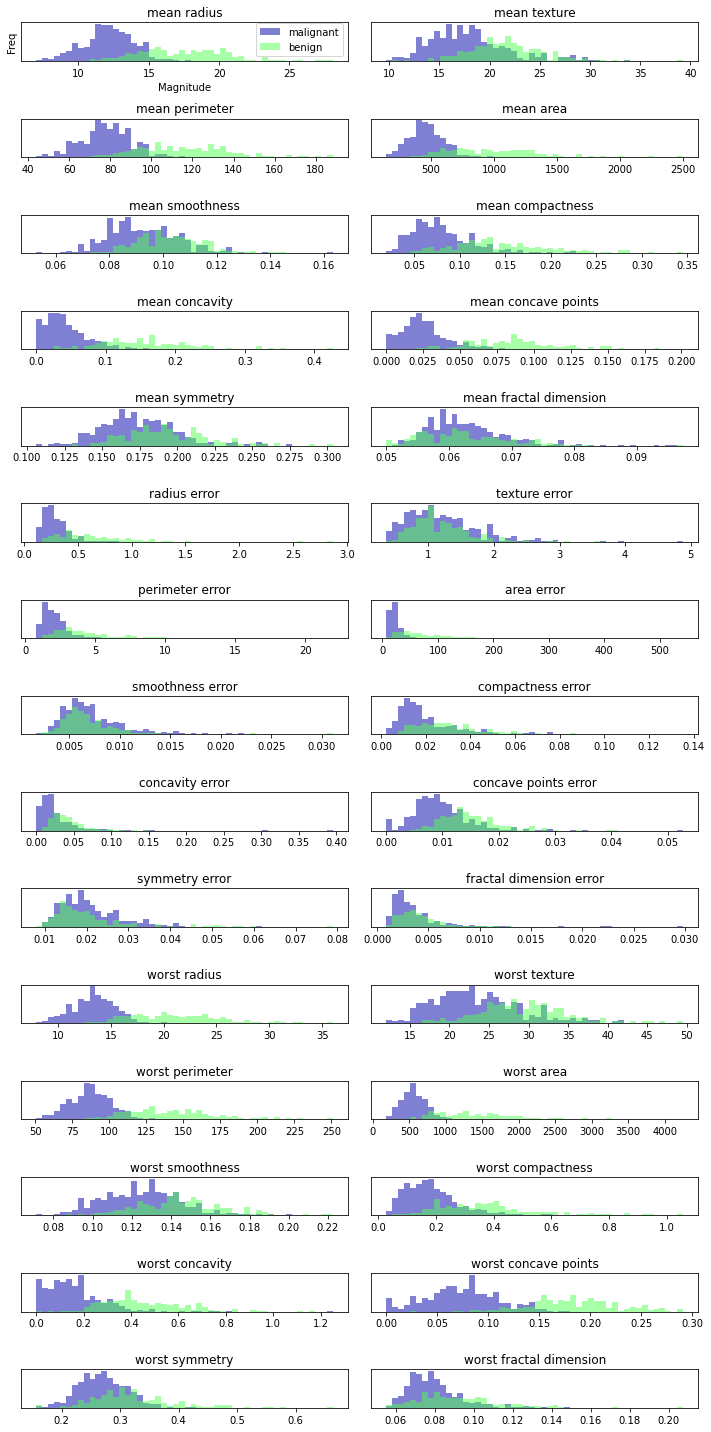

In [35]:
fig, axes = plt.subplots(15,2,figsize=(10,20))
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins = 50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Magnitude")
ax[0].set_ylabel("Freq")
ax[0].legend(["malignant","benign"], loc="best")
fig.tight_layout()

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print(X_scaled.shape,X_pca.shape)

(569, 30) (569, 2)


Text(0, 0.5, 'Second PCA')

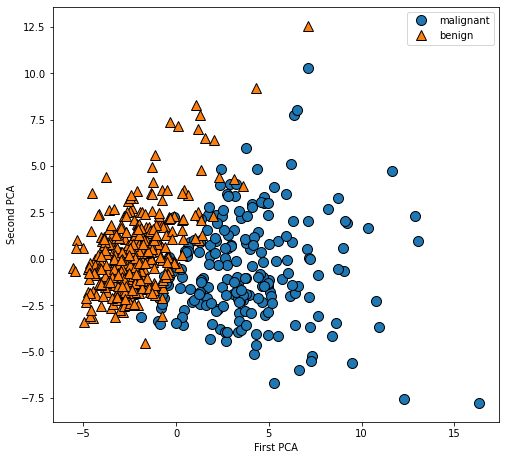

In [38]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1],cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First PCA")
plt.ylabel("Second PCA")

In [39]:
pca3 = PCA(n_components=3)
pca3.fit(X_scaled)
X_pca3 = pca3.transform(X_scaled)
print(X_scaled.shape,X_pca3.shape)

(569, 30) (569, 3)
